# ITERATION 1

In [4]:
import os
for directory,_,files in os.walk('.\dataset'):
    for file in files:
        print(os.path.join(directory,file))

.\dataset\input\gender_submission.csv
.\dataset\input\test.csv
.\dataset\input\train.csv
.\dataset\output\submission.csv


In [6]:
import pandas as pd
train_path = "./dataset/input/train.csv"
test_path  = "./dataset/input/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print('--------')
print('Percentage of NA per property sorted')
print('--------')
p = (train.isna().sum()/len(train)*100).sort_values(ascending=False)
print(p)
print('--------')
print('Unique values for duplications and other useful info')
print('--------')
u = train.nunique().sort_values()
print(u)

--------
Percentage of NA per property sorted
--------
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64
--------
Unique values for duplications and other useful info
--------
Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64


In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [12]:
from sklearn import preprocessing

def cleanData(data):    
    # Data missing and categorical to drop
    data.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

    # Data missing Case2
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # FARE Data missing in test
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

    # Data missing Case3
    data.dropna(axis=0, subset=['Embarked'], inplace=True)
    
    # Categorical Data
    le = preprocessing.LabelEncoder()
    
    # Sex
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)
    
    # Embarked
    data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
    
    return data

In [13]:
clean_train = cleanData(train)
clean_test = cleanData(test)

In [14]:
print(clean_train.info())
print(clean_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 

In [17]:
from sklearn import model_selection
# Set X and y
y = train['Survived']
X = pd.get_dummies(train.drop('Survived', axis=1))

# Split model train test data
X_train, X_val, y_train, y_val = model_selection.train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
from sklearn import metrics
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return metrics.accuracy_score(y_val, prediction)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#Lets some models
model1 = LogisticRegression(solver='liblinear', random_state=42)
model2 = GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = SGDClassifier()
model5 = SVC()

models = [model1, model2, model3, model4, model5]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print("ACC: ", fitAndPredict(model))

Model  1 : LogisticRegression(random_state=42, solver='liblinear')
ACC:  0.797752808988764
Model  2 : GradientBoostingClassifier()
ACC:  0.8202247191011236
Model  3 : RandomForestClassifier()
ACC:  0.797752808988764
Model  4 : SGDClassifier()
ACC:  0.7303370786516854
Model  5 : SVC()
ACC:  0.6348314606741573


In [20]:
model = GradientBoostingClassifier(min_samples_split=20, min_samples_leaf=60, max_depth=3, max_features=7)
fitAndPredict(model)

0.8370786516853933

In [23]:
predict = model.predict(pd.get_dummies(clean_test))

output = pd.DataFrame({'PassengerId': clean_test.PassengerId, 'Survived': predict})
output.to_csv('./output/submission.csv', index=False)
print("Submission saved")

Submission saved


# ITERATION 2

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.\dataset\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\dataset\input\gender_submission.csv
.\dataset\input\test.csv
.\dataset\input\train.csv


In [8]:
import category_encoders as encoders
from pandas.api.types import is_numeric_dtype

from imblearn.over_sampling import SMOTE
from sklearn import model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_path = "./dataset/input/train.csv"
test_path  = "./dataset/input/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [3]:
print(df_train.info())
print('Size of Train data set = {}'.format(df_train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Size of Train data set = (891, 12)


In [4]:
# Delete columns with unique identifiers
col_lst = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_train.drop(col_lst, axis = 1, inplace=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [5]:
print(df_train.isnull().sum()/len(df_train)*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64


In [6]:
fare_median = df_train[(df_train['Fare']>0) & (df_train['Fare'].isnull() == False)]['Fare'].median()
age_median = df_train[(df_train['Age']>0) & (df_train['Age'].isnull() == False)]['Age'].median()
print('Median = {}'.format(age_median))
print('No. of records with non-null Age = {}'.format(df_train[(df_train['Age']>0) & (df_train['Age'].isnull() == False)]['Age'].count()))
print('===={} of Median {} with {} Null Records===='.format('Age', age_median, df_train[(df_train['Age'].isnull() == True)]['Survived'].count()))
df_train['Age'].fillna(age_median, inplace=True)

Median = 28.0
No. of records with non-null Age = 714
====Age of Median 28.0 with 177 Null Records====


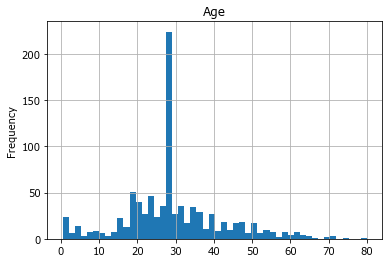

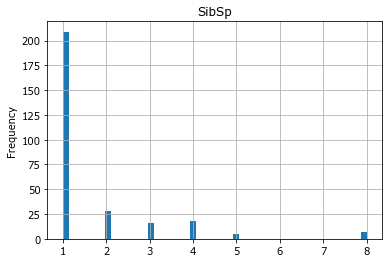

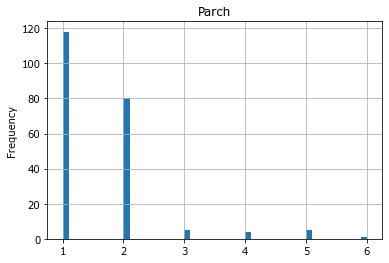

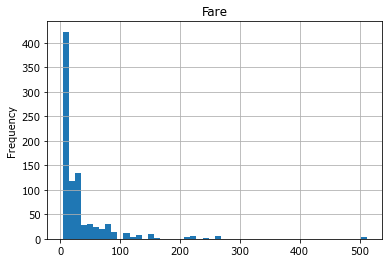

In [9]:
numerical = ['Age', 'SibSp', 'Parch', 'Fare']
%matplotlib inline
import matplotlib.pyplot as plt

for col in numerical:
    if is_numeric_dtype(df_train[col]) == True:
        df_train[df_train[col]>0][col].plot.hist(bins=50, grid=True, legend=None)
        plt.title(col)
        plt.show()

In [10]:
CATBoostENCODE = encoders.CatBoostEncoder()
categorical = ['Pclass', 'Sex', 'Embarked']

# Cast teh Pclass from integer to string so that we can apply the categorical encoding later
df_train['Pclass'] = df_train['Pclass'].astype(str)

df_target = df_train['Survived'].astype(str)

# Use CatBoost to encode the categorical values
encoder_cat = CATBoostENCODE.fit_transform(df_train[categorical], df_target)
encoded_cat = pd.DataFrame(encoder_cat)
print(encoded_cat.head(10))

     Pclass       Sex  Embarked
0  0.383838  0.383838  0.383838
1  0.383838  0.383838  0.383838
2  0.191919  0.691919  0.191919
3  0.691919  0.794613  0.461279
4  0.461279  0.191919  0.595960
5  0.345960  0.127946  0.383838
6  0.794613  0.095960  0.476768
7  0.276768  0.076768  0.397306
8  0.230640  0.845960  0.340548
9  0.383838  0.876768  0.691919


In [11]:
df_model_data = df_train.copy()
df_model_data.drop(categorical, axis = 1, inplace=True)
df_model_data = pd.concat([df_model_data, encoded_cat], axis=1)
df_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Pclass    891 non-null    float64
 6   Sex       891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


In [15]:
def get_oversample (features, label):

    smote = SMOTE()
    
    X_smote, Y_smote = smote.fit_resample(features, label)
    print("length of original data is ",len(features))
    print("Proportion of True data in original data is ",len(label[label['Survived']==1])/len(label))
    print("Proportion of False data in original data is ",len(label[label['Survived']==0])/len(label))

    print("length of oversampled data is ",len(X_smote))
    print("Proportion of True data in oversampled data is ",len(Y_smote[Y_smote['Survived']==1])/len(Y_smote))
    print("Proportion of False data in oversampled data is ",len(Y_smote[Y_smote['Survived']==0])/len(Y_smote))
   
    return X_smote, Y_smote, features, label

In [16]:
Y = df_model_data.iloc[:,0:1]
X = df_model_data.iloc[:,1:]
X_smote, Y_smote, X_train,Y_train = get_oversample(X, Y)

length of original data is  891
Proportion of True data in original data is  0.3838383838383838
Proportion of False data in original data is  0.6161616161616161
length of oversampled data is  1098
Proportion of True data in oversampled data is  0.5
Proportion of False data in oversampled data is  0.5


## GRID SEARCH

### RANDOM FOREST

In [17]:
# parameter list
p_cv = 5
p_score = 'accuracy'

# Maximum number of depth in each tree:
max_depth = [7,8,9,10,11,12]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [10,15,20,40,60,80]## Decision Tree
# Minimum number of samples to consider to split a node:
min_samples_split = [10,15,20,40]
# No. of estimators
estimators = [50, 100, 150, 200,300,500]

clf = RandomForestClassifier()
forest_params_grid={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf}

cv = model_selection.StratifiedKFold(n_splits=p_cv, random_state=56456, shuffle=True)
model = model_selection.GridSearchCV(estimator= clf, param_grid=forest_params_grid, cv=cv, scoring=p_score, n_jobs=-1, verbose=1)

In [19]:
model.fit(X_smote, Y_smote.values.ravel())
print(model.best_estimator_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500}
RandomForestClassifier(max_depth=12, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=500)
